In [25]:
'''
Girish Rajani-Bathija
A20503736
CS 577 - F22
Assignment 4 Binary Classification
'''

from keras import models, layers, optimizers
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, shutil

In [14]:
#Path to directories where original dataset was uncompressed
original_cat_dataset_dir = 'D:/Users/giris/Downloads/PetImages/Cat'
original_dog_dataset_dir = 'D:/Users/giris/Downloads/PetImages/Dog'
#Directory where the smaller dataset will be stored
base_dir = 'D:/Users/giris/Downloads/cats_and_dogs_small'
os.mkdir(base_dir)

#Directories for training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#Directory with training cats and dogs images
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

#Directory with validation cats and dogs images
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

#Directory with testing cats and dogs images
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

#Cat:
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_cat_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_cat_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_cat_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

#dog:
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dog_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dog_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dog_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
print('done')

done


In [16]:
#Build model with convolution layers, pooling, and normalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 74, 74, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                      

In [17]:
#Compile the model using optimizer and loss function
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [82]:
#preprocess data using ImageDataGenerator

#with data augmentation:

#rescale all images by 1/255
train_datagen = ImageDataGenerator(
    rescale=1./255,                               
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

#without data augmentation
'''train_datagen = ImageDataGenerator(
    rescale=1./255)'''
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, #image folder
    target_size=(150,150),
    batch_size=20, #was 20 before
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20, #was 20 before
    class_mode='binary')
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20, #was 20 before
    class_mode='binary')

#save model
model.save('cats_and_dogs_small_2.h5')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [54]:
#fit model with data augmentation after tuning
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 16s 151ms/step - loss: 0.8889 - accuracy: 0.6010 - val_loss: 1.2531 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 15s 154ms/step - loss: 0.8304 - accuracy: 0.6235 - val_loss: 1.0548 - val_accuracy: 0.5000
Epoch 3/30
100/100 [==============================] - 15s 154ms/step - loss: 0.8474 - accuracy: 0.6380 - val_loss: 1.0129 - val_accuracy: 0.5050
Epoch 4/30
100/100 [==============================] - 15s 153ms/step - loss: 0.8368 - accuracy: 0.6470 - val_loss: 1.1541 - val_accuracy: 0.5160
Epoch 5/30
100/100 [==============================] - 15s 151ms/step - loss: 0.7807 - accuracy: 0.6600 - val_loss: 0.8533 - val_accuracy: 0.6070
Epoch 6/30
100/100 [==============================] - 15s 150ms/step - loss: 0.7960 - accuracy: 0.6585 - val_loss: 0.6554 - val_accuracy: 0.6720
Epoch 7/30
100/100 [==============================] - 16s 155ms/step - loss: 0.7812 - accuracy: 0.6570 - val_loss: 0.6262 - val_ac

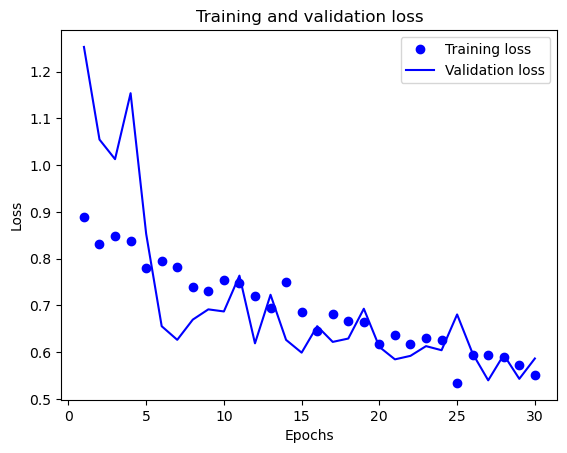

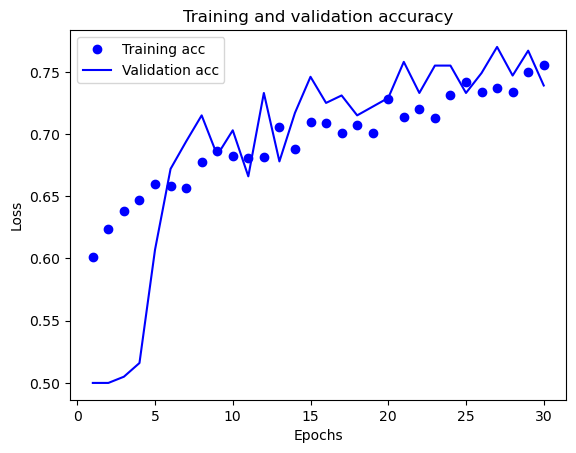

50/50 [==============================] - 2s 47ms/step - loss: 0.6522 - accuracy: 0.7530
Test loss: 0.6522034406661987
Test accuracy: 0.753000020980835


In [56]:
#Plot training and validation loss graph as a function of epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Evaluate accuracy/loss of model on test data
loss, accuracy = model.evaluate(test_generator, steps=50)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

In [19]:
#Visualize the activation of some of the convolution layers:

#load existing model
model = load_model('cats_and_dogs_small_2.h5')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 74, 74, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                      

(1, 150, 150, 3)


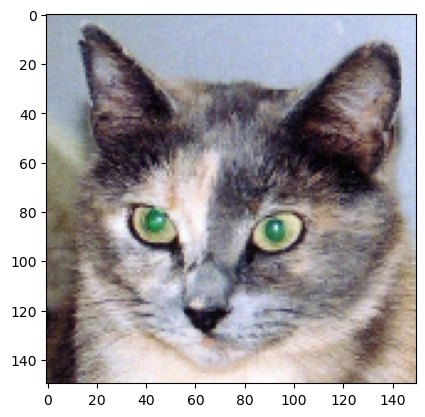

In [20]:
img_path = 'D:/Users/giris/Downloads/cats_and_dogs_small/test/cats/1700.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

#show image
plt.imshow(img_tensor[0])
plt.show()


D:\Users\giris\anaconda3\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


(1, 148, 148, 32)


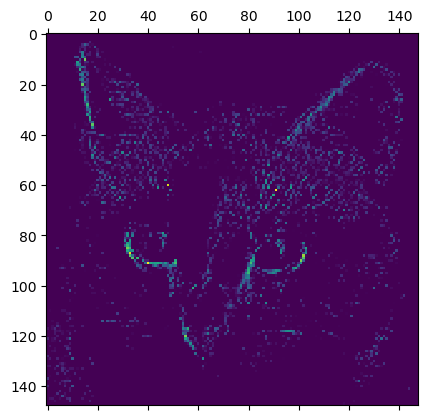

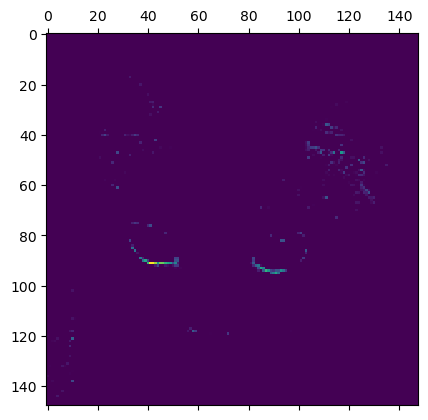

In [21]:
#select outputs of the top 9 layers
layer_outputs = [layer.output for layer in model.layers[:9]]

#create new model
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

#run the model on the loaded image
activations = activation_model.predict(img_tensor)

#Examine the returned activation
first_layer_activation = activations[0]
print(first_layer_activation.shape)

#Visualize the 5th, and 7th channels of the first layer
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

C:\Users\giris\AppData\Local\Temp\ipykernel_35148\1654864441.py:29: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


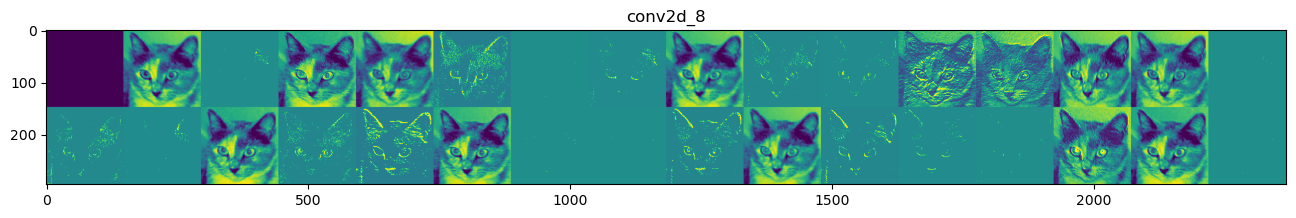

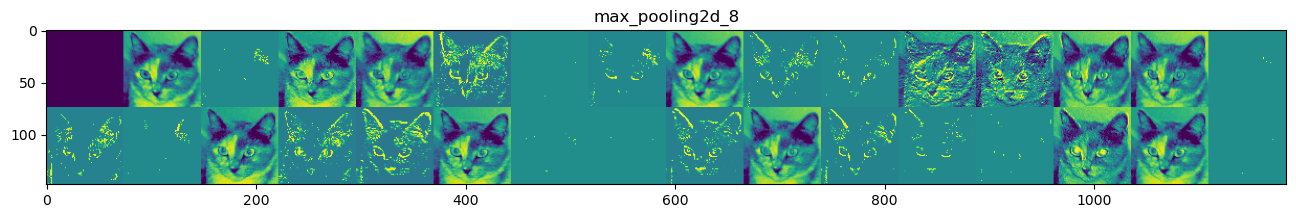

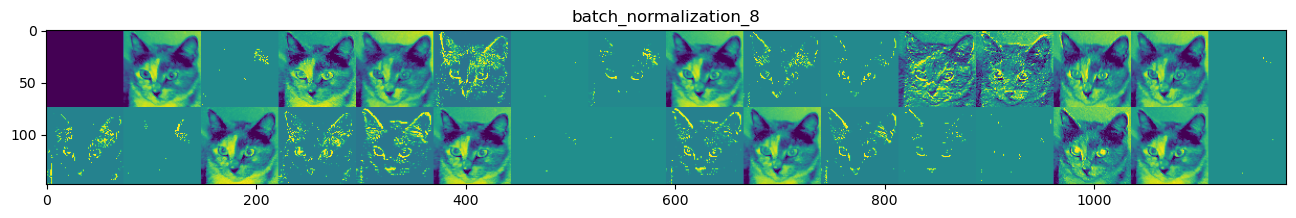

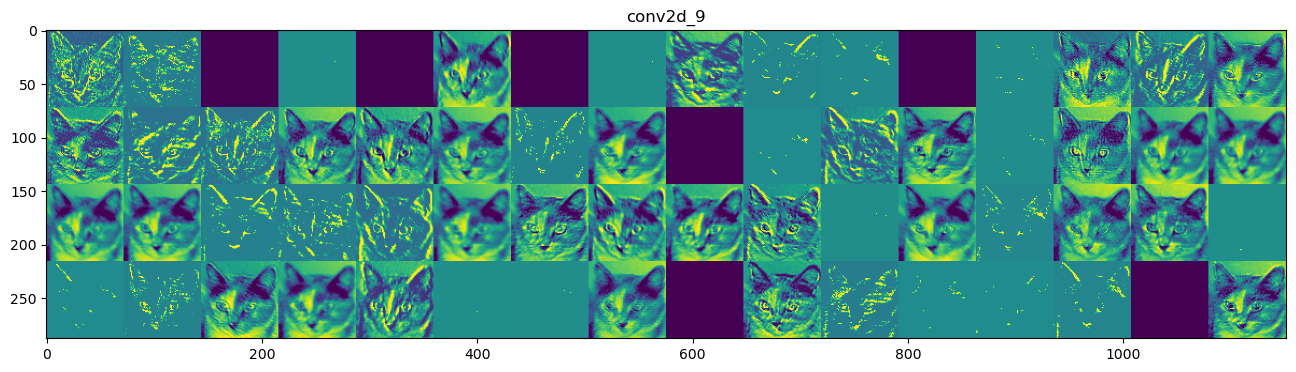

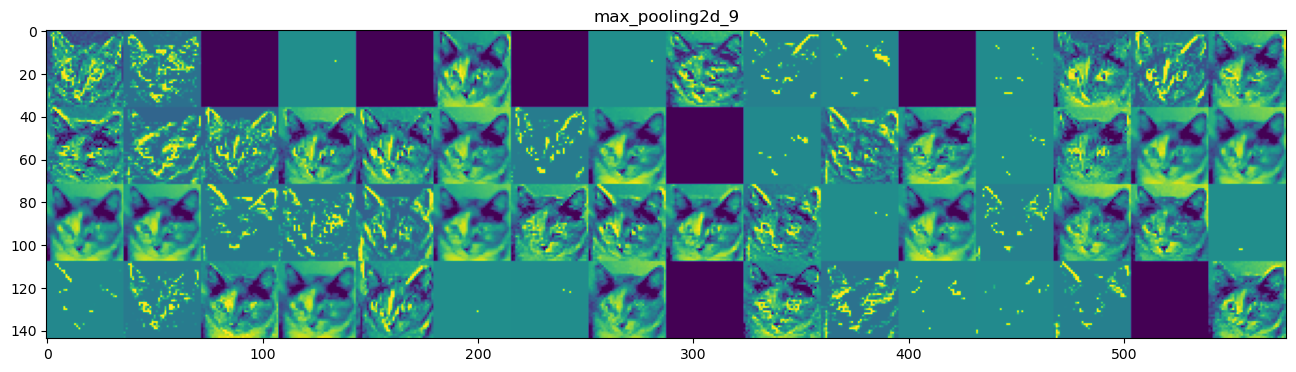

In [22]:
#Get desired first 5 layer names
layer_names = []
for layer in model.layers[:5]:
    layer_names.append(layer.name)
    
images_per_row = 16

#scan activation maps - already inside "activations"
for layer_name, layer_activation in zip(layer_names, activations):
    #get number of channels in the current layer
    n_features = layer_activation.shape[-1]
    
    #get image size
    size = layer_activation.shape[1]
    
    #compute the number of rows in the resulting image grid
    n_cols = n_features // images_per_row
    #allocate display grid as one big image
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    #title each image into activation grid
    for col in range(n_cols):
        for row in range(images_per_row):
            #retrieve i-th channel
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            #normalize channel 
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    
    #plot and visualize the activation of the first 5 layers:
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

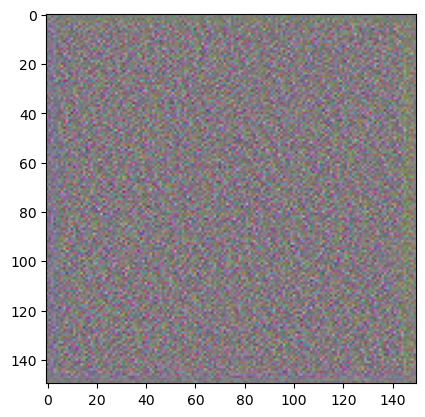

In [35]:
#Define response measure for the activation of filter 0 in the layer conv2d_24
layer_name = 'conv2d_9'
filter_index = 0
tf.compat.v1.disable_eager_execution()

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def generate_pattern(layer_name, filter_index, size=150):
    #define output and loss
    layer_output = model.get_layer(layer_name).output
    #use the average response as response measure to maximize
    loss = K.mean(layer_output[:, :, :, filter_index])

    #compute gradient with respect to model input
    grads = K.gradients(loss, model.input)[0]

    #extract the gradient of interest with respect to the input and normalize the gradient vector
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    #instantiate keras function with inputs and outputs and define sub-graph for computation
    iterate = K.function([model.input], [loss, grads])

    #Starts from a gray image with some noise
    input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

    step = 1.
    #run 40 gradient ascent iterations
    for i in range(40):
        #evaluate sub-graph for current input
        loss_value, grads_value = iterate([input_img_data])
        #update the image using the gradient and step size
        input_img_data += grads_value * step
    #return result
    img = input_img_data[0]
    return deprocess_image(img)

#Plot channel 0 of the 'conv2d_24' layer
plt.imshow(generate_pattern('conv2d_9', 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


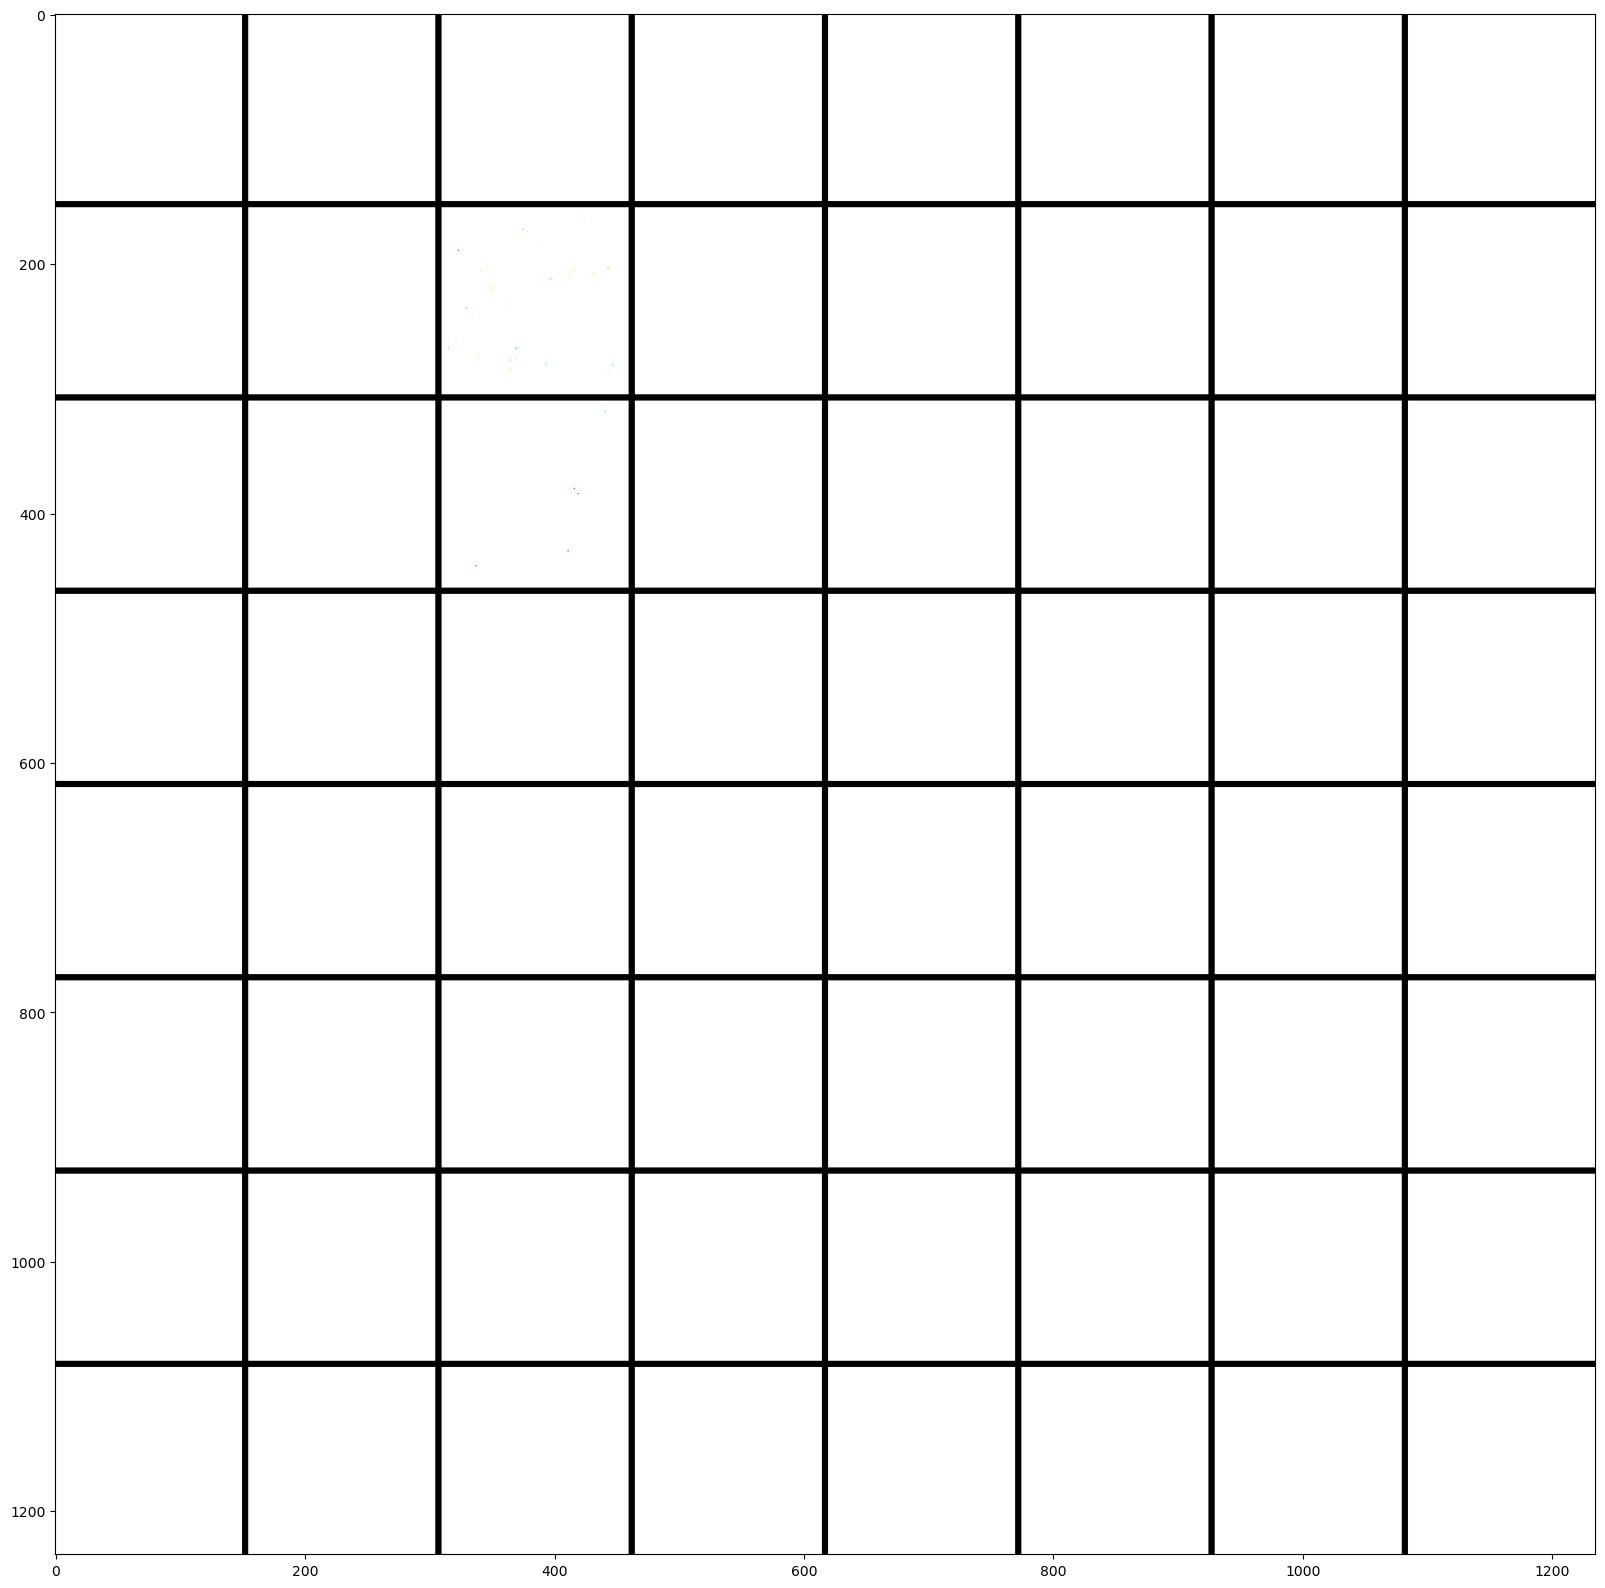

In [34]:
layer_name = 'conv2d_9'
size = 150
margin = 5
results = np.zeros((8 * size+7* margin, 8 * size+7* margin, 3))
for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
    
plt.figure(figsize=(20, 20))
plt.imshow(results)

In [47]:
#Instantiating the VGG16 conv base
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3))


#freeze the loaded model
conv_base.trainable = False

#add the loaded model as a layer
conv_base_model = models.Sequential()
conv_base_model.add(conv_base)
conv_base_model.add(layers.Flatten())
conv_base_model.add(layers.Dense(256, activation='relu'))
conv_base_model.add(layers.Dense(1, activation='sigmoid'))
print(conv_base_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [48]:
#Compile the model using optimizer and loss function
conv_base_model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [49]:
#fit model without data augmentation and with frozen conv base
history = conv_base_model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30, #do 100 epochs later
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 20.0000 - loss: 0.4002 - accuracy: 0.8115

D:\Users\giris\anaconda3\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


100/100 [==============================] - 23s 174ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.4002 - accuracy: 0.8115 - val_loss: 0.3021 - val_accuracy: 0.8620
Epoch 2/30
100/100 [==============================] - 7s 73ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.2377 - accuracy: 0.9030 - val_loss: 0.2456 - val_accuracy: 0.9000
Epoch 3/30
100/100 [==============================] - 7s 72ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.1939 - accuracy: 0.9215 - val_loss: 0.2989 - val_accuracy: 0.8710
Epoch 4/30
100/100 [==============================] - 7s 74ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.1460 - accuracy: 0.9465 - val_loss: 0.2286 - val_accuracy: 0.9070
Epoch 5/30
100/100 [==============================] - 7s 72ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.1214 - accuracy: 0.9560 - val_loss: 0.2340 - val_accuracy: 0.9090
Epoch 6/30
100/100 [==============================] - 7s 73ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.0957 - accuracy: 0.

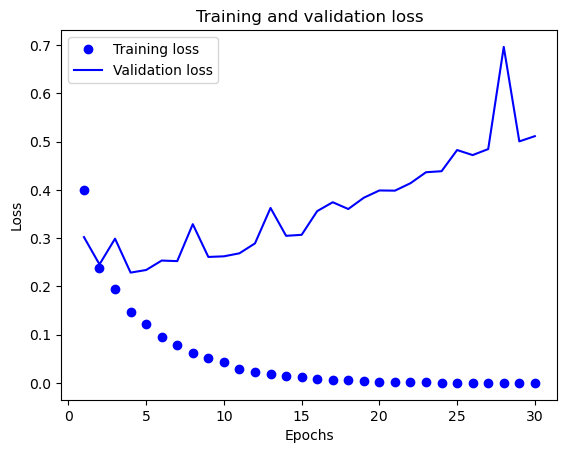

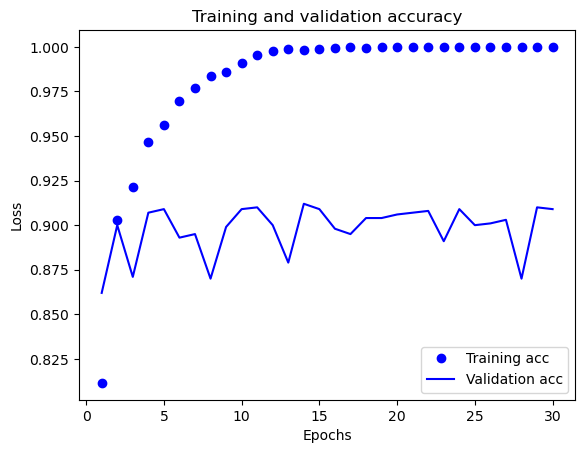

Test loss: 0.5693712685722858
Test accuracy: 0.889


In [50]:
#Plot training and validation loss graph as a function of epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Evaluate accuracy/loss of model on test data
loss, accuracy = conv_base_model.evaluate(test_generator, steps=50)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

In [64]:
#Instantiating the VGG16 conv base
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3))


#unfreeze the loaded model
conv_base.trainable = True

#add the loaded model as a layer
conv_base_model = models.Sequential()
conv_base_model.add(conv_base)
conv_base_model.add(layers.Flatten())
conv_base_model.add(layers.Dense(256, activation='relu'))
conv_base_model.add(layers.Dense(1, activation='sigmoid'))
print(conv_base_model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dense_14 (Dense)            (None, 256)               2097408   
                                                                 
 dense_15 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
#Compile the model using optimizer and loss function
conv_base_model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [67]:
#fit model without data augmentation but unfreezing the conv base
history = conv_base_model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=5, #do 100 epochs later
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/5
100/100 [==============================] - 13s 129ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.2392 - accuracy: 0.8975 - val_loss: 0.2916 - val_accuracy: 0.8900
Epoch 2/5
100/100 [==============================] - 13s 129ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.1777 - accuracy: 0.9390 - val_loss: 0.2548 - val_accuracy: 0.9190
Epoch 3/5
100/100 [==============================] - 13s 131ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.1267 - accuracy: 0.9575 - val_loss: 0.3690 - val_accuracy: 0.9070
Epoch 4/5
100/100 [==============================] - 13s 134ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.0971 - accuracy: 0.9700 - val_loss: 0.2792 - val_accuracy: 0.9170
Epoch 5/5
100/100 [==============================] - 14s 136ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.1242 - accuracy: 0.9715 - val_loss: 0.2763 - val_accuracy: 0.9030


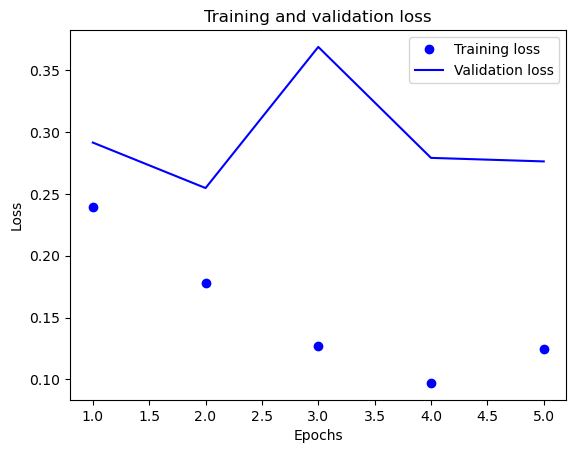

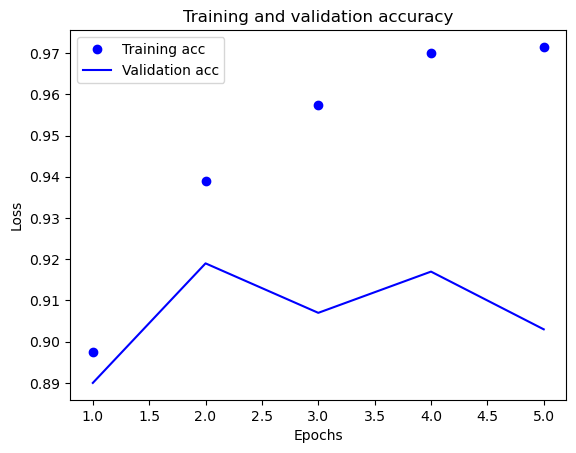

Test loss: 0.2783838370628655
Test accuracy: 0.903


In [68]:
#Plot training and validation loss graph as a function of epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Evaluate accuracy/loss of model on test data
loss, accuracy = conv_base_model.evaluate(test_generator, steps=50)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

In [78]:
#Instantiating the VGG16 conv base
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3))


#freeze the loaded model
conv_base.trainable = True

#add the loaded model as a layer
conv_base_model = models.Sequential()
conv_base_model.add(conv_base)
conv_base_model.add(layers.Flatten())
conv_base_model.add(layers.Dense(256, activation='relu'))
conv_base_model.add(layers.Dense(1, activation='sigmoid'))
print(conv_base_model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_10 (Flatten)        (None, 8192)              0         
                                                                 
 dense_18 (Dense)            (None, 256)               2097408   
                                                                 
 dense_19 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________
None


In [79]:
#Compile the model using optimizer and loss function
conv_base_model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [80]:
#fit model with data augmentation using frozen conv base
history = conv_base_model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/5
100/100 [==============================] - 23s 174ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.7274 - accuracy: 0.5230 - val_loss: 0.6776 - val_accuracy: 0.5080
Epoch 2/5
100/100 [==============================] - 16s 158ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.6244 - accuracy: 0.6545 - val_loss: 0.4691 - val_accuracy: 0.7770
Epoch 3/5
100/100 [==============================] - 16s 158ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.5187 - accuracy: 0.7520 - val_loss: 0.3509 - val_accuracy: 0.8430
Epoch 4/5
100/100 [==============================] - 16s 158ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.4529 - accuracy: 0.7850 - val_loss: 0.2962 - val_accuracy: 0.8750
Epoch 5/5
100/100 [==============================] - 16s 160ms/step - batch: 49.5000 - size: 20.0000 - loss: 0.3799 - accuracy: 0.8375 - val_loss: 0.2716 - val_accuracy: 0.8890


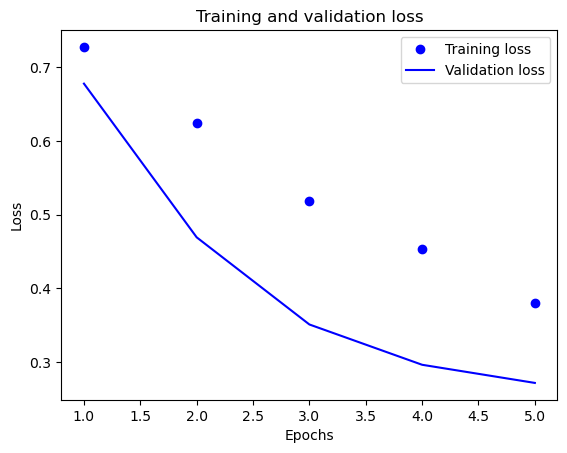

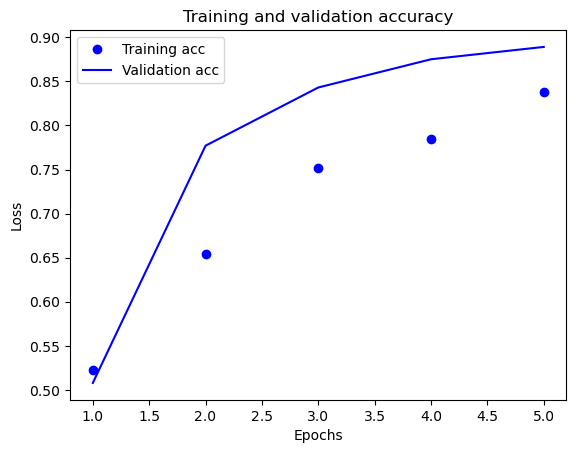

Test loss: 0.2962006203830242
Test accuracy: 0.887


In [81]:
#Plot training and validation loss graph as a function of epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Evaluate accuracy of final model
loss, accuracy = conv_base_model.evaluate(test_generator, steps=50)
print('Test loss:', loss)
print('Test accuracy:', accuracy)